In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import joblib
X = joblib.load('/content/drive/My Drive/joblib/RavdessAndTess/X.joblib')
y = joblib.load('/content/drive/My Drive/joblib/RavdessAndTess/y.joblib')

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [31]:
import os
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential

model = Sequential()
model.add(Conv1D(64, 5, padding='same',
                  input_shape=(40, 1)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_3 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

In [32]:

model.compile(loss='sparse_categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

cnn_history = model.fit(x_traincnn, y_train,
                        batch_size=32, epochs=50,
                        validation_data=(x_testcnn, y_test))


Train on 4726 samples, validate on 526 samples
Epoch 1/50
4726/4726 [==============================] - 1s 121us/step - loss: 4.6462 - accuracy: 0.4116 - val_loss: 1.1136 - val_accuracy: 0.6331
Epoch 2/50
4726/4726 [==============================] - 0s 103us/step - loss: 1.9163 - accuracy: 0.5967 - val_loss: 1.1075 - val_accuracy: 0.6540
Epoch 3/50
4726/4726 [==============================] - 0s 99us/step - loss: 1.1528 - accuracy: 0.6545 - val_loss: 1.0516 - val_accuracy: 0.6844
Epoch 4/50
4726/4726 [==============================] - 0s 98us/step - loss: 0.8437 - accuracy: 0.7118 - val_loss: 0.7595 - val_accuracy: 0.7300
Epoch 5/50
4726/4726 [==============================] - 0s 99us/step - loss: 0.7239 - accuracy: 0.7484 - val_loss: 0.6918 - val_accuracy: 0.7471
Epoch 6/50
4726/4726 [==============================] - 0s 101us/step - loss: 0.6804 - accuracy: 0.7554 - val_loss: 0.7004 - val_accuracy: 0.7529
Epoch 7/50
4726/4726 [==============================] - 0s 100us/step - loss: 0.

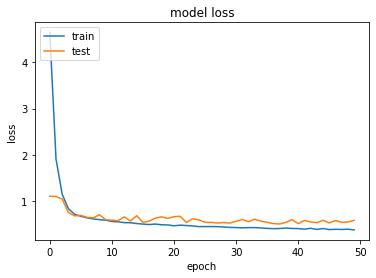

In [33]:
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


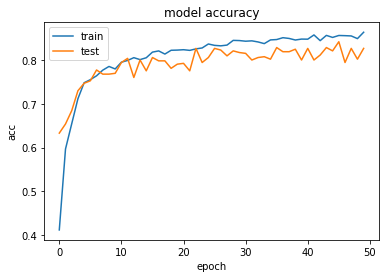

In [34]:
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
predictions = model.predict_classes(x_testcnn)

In [36]:
predictions

array([3, 3, 3, 4, 0, 1, 7, 3, 1, 0, 2, 4, 2, 3, 7, 2, 6, 3, 4, 2, 6, 5,
       1, 0, 2, 6, 7, 6, 6, 4, 1, 0, 3, 2, 3, 7, 2, 3, 2, 0, 0, 5, 5, 3,
       4, 5, 3, 1, 4, 7, 4, 6, 2, 5, 3, 7, 7, 6, 1, 5, 5, 4, 2, 5, 7, 2,
       5, 4, 0, 3, 0, 4, 0, 4, 1, 2, 5, 7, 3, 3, 4, 5, 3, 4, 5, 5, 2, 7,
       2, 6, 7, 0, 6, 5, 2, 4, 2, 4, 6, 3, 5, 0, 5, 2, 1, 2, 6, 7, 5, 4,
       0, 4, 0, 1, 6, 7, 6, 7, 4, 2, 6, 5, 3, 1, 7, 0, 7, 0, 7, 7, 0, 6,
       4, 6, 7, 0, 2, 7, 3, 3, 0, 4, 5, 4, 7, 4, 5, 1, 2, 2, 6, 7, 2, 2,
       2, 7, 1, 6, 6, 7, 3, 1, 7, 0, 5, 4, 5, 5, 2, 4, 3, 6, 6, 4, 0, 3,
       6, 4, 6, 2, 7, 4, 5, 3, 1, 4, 4, 5, 5, 5, 1, 5, 3, 4, 3, 0, 4, 5,
       4, 6, 2, 7, 3, 0, 2, 3, 4, 6, 0, 2, 2, 7, 2, 5, 4, 2, 5, 5, 4, 1,
       6, 0, 7, 2, 5, 7, 1, 3, 0, 1, 2, 3, 4, 5, 4, 4, 5, 7, 3, 6, 6, 5,
       6, 0, 5, 2, 6, 2, 3, 6, 5, 7, 7, 3, 7, 1, 6, 6, 7, 6, 1, 2, 6, 5,
       1, 2, 5, 3, 2, 4, 6, 3, 1, 5, 4, 2, 5, 5, 4, 4, 6, 0, 3, 6, 1, 4,
       4, 0, 5, 0, 2, 2, 5, 2, 6, 0, 3, 5, 7, 4, 1,

In [0]:
new_y_test = y_test.astype(int)

In [38]:
new_y_test

array([3, 3, 3, 4, 0, 1, 7, 3, 1, 0, 2, 4, 2, 3, 2, 2, 6, 3, 4, 2, 4, 5,
       1, 0, 2, 3, 7, 3, 6, 3, 1, 1, 3, 2, 3, 7, 2, 3, 2, 0, 0, 5, 5, 3,
       4, 0, 3, 0, 4, 7, 4, 6, 1, 5, 5, 7, 6, 6, 4, 5, 5, 4, 2, 5, 3, 7,
       3, 4, 0, 3, 0, 4, 0, 4, 1, 2, 5, 7, 3, 3, 4, 5, 3, 4, 5, 4, 2, 7,
       2, 6, 7, 0, 4, 5, 2, 4, 2, 4, 6, 3, 5, 0, 5, 2, 1, 2, 6, 7, 5, 4,
       0, 4, 0, 1, 4, 7, 6, 7, 4, 2, 4, 3, 3, 1, 3, 0, 0, 0, 7, 0, 0, 6,
       4, 6, 4, 0, 2, 7, 3, 3, 0, 5, 3, 4, 7, 4, 5, 1, 1, 2, 6, 7, 3, 3,
       2, 7, 1, 6, 6, 0, 3, 1, 7, 0, 5, 4, 5, 5, 2, 4, 5, 6, 6, 4, 0, 3,
       1, 4, 1, 2, 7, 4, 5, 3, 1, 4, 4, 0, 5, 5, 3, 5, 3, 4, 3, 0, 4, 5,
       4, 6, 2, 6, 3, 3, 1, 3, 4, 6, 0, 2, 3, 7, 2, 5, 4, 2, 5, 5, 4, 1,
       6, 0, 7, 2, 5, 7, 1, 3, 0, 1, 2, 3, 4, 5, 4, 4, 5, 7, 3, 0, 6, 5,
       6, 0, 3, 2, 6, 2, 3, 6, 5, 7, 7, 1, 7, 1, 6, 6, 0, 6, 1, 3, 6, 5,
       3, 2, 5, 3, 2, 6, 6, 5, 1, 5, 4, 2, 5, 5, 4, 4, 6, 0, 3, 1, 1, 4,
       4, 4, 5, 0, 2, 5, 5, 2, 6, 0, 3, 5, 7, 4, 1,

In [39]:
from sklearn.metrics import classification_report
report = classification_report(new_y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.80      0.86        59
           1       0.74      0.72      0.73        43
           2       0.81      0.90      0.85        68
           3       0.90      0.67      0.76        78
           4       0.91      0.85      0.88        85
           5       0.86      0.87      0.87        78
           6       0.72      0.87      0.79        62
           7       0.74      0.94      0.83        53

    accuracy                           0.83       526
   macro avg       0.83      0.83      0.82       526
weighted avg       0.84      0.83      0.83       526



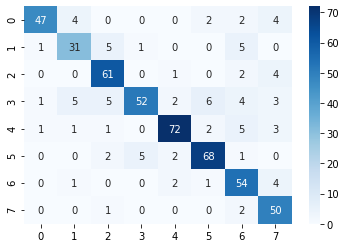

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix = confusion_matrix(new_y_test, predictions)
sns.heatmap(matrix, annot=True, cmap='Blues')

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

In [41]:
model_name = 'Ravdess_And_Tess_SER_Model.h5'
save_dir = '/content/drive/My Drive/Final SER'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/My Drive/Final SER/Ravdess_And_Tess_SER_Model.h5 


In [42]:
import keras
loaded_model = keras.models.load_model('/content/drive/My Drive/Final SER/Ravdess_And_Tess_SER_Model.h5')
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_3 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 20488     
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
Total params: 20,872
Trainable params: 20,872
Non-trainable params: 0
__________________________________________________

In [43]:
loss, acc = loaded_model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

526/526 [==============================] - 0s 74us/step
Restored model, accuracy: 82.70%
